# X-ray Analysis
Next, let's try using the X-ray analysis portion of the package



In [8]:
from G4EPP import api

# Instantiating this will download the ionization table data if first time running
Api = api()

from G4EPP import XrayAnalysis
from G4EPP import EnergyDistributions as dists

import matplotlib.pyplot as plt
import numpy as np

# X-ray Analysis Example

X-ray response to an energetic electron precipitation event with the following characterisitics:

- Energy distribution: exponential energy $$f(E,\alpha) \propto \frac{1}{E_0} e^{-E / E_0}$$ with folding energies E$_0$ = 100, 500, and 1000 keV



- Energy-integrated flux: $$\int f(E,\alpha) ~dE =  10^4~cm^{-2}~s^{-1}~sr^{-1}$$



- Pitch angle distribution: $$f(E, \alpha) \propto \sin(\alpha)$$

In [13]:
X = XrayAnalysis();

# Import the abscissa for the 2d histogram, which is where the X-ray spectra come from
Eabsc = Api.get_energy_array()

# Import the (E,alpha) control points with which the input electron spectra are evaluated
E     = Api.get_run_list() # eV
PA    = Api.get_PA_list()  # deg

# Import a specific distribution type (feel free to type your own in as a lambda function)
ExpDist = dists().exponential()

# Define pitch angle distribution
PAD = np.sin(np.deg2rad(PA)) # sine
#PAD = np.ones(PA.shape)      # isotropic

# Define folding energies in eV
E0s = np.array([100, 500, 1000]) * 1e3 

# Input differential electron spectra and plot resulting X-ray spectra

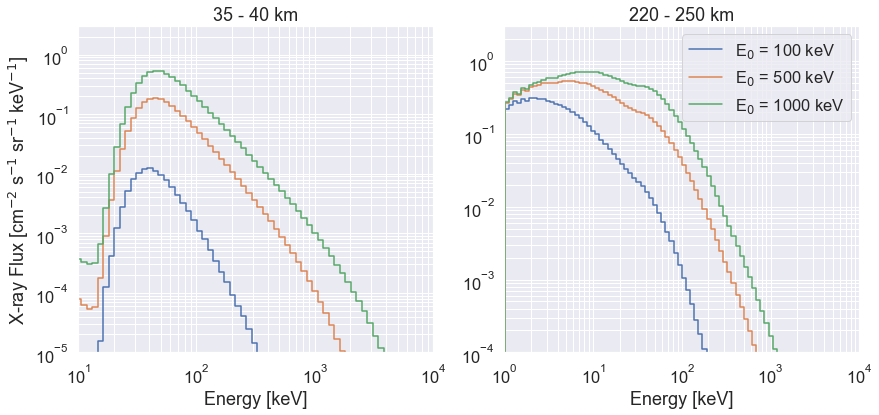

In [22]:

# Altitude between which the X-ray spectra is averaged
alt1 = 35  # km
alt2 = 40  # km

plt.figure(figsize=(14,6)); plt.subplot(1,2,1); plt.grid(True, which='both')
for E0 in E0s:
    
    # Input: (precipitating electron spectra, pitch angle distribution, integral flux, [altitude bounds])
    spectrum = X.getSpectrumAtAltitude(ExpDist(E, E0), PAD, 1e4, [alt1, alt2])

    # Plot output: differential X-ray spectra vs. energy between alt1 - alt2
    plt.step(Eabsc, spectrum)

# Plotting details
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Energy [keV]")
plt.ylabel("X-ray Flux [cm$^{-2}$ s$^{-1}$ sr$^{-1}$ keV$^{-1}$]")
plt.ylim(1e-5, 3e0);
plt.xlim(1e1, 1e4);
plt.title('%.0f - %.0f km' % (alt1, alt2))


alt1 = 220  # km
alt2 = 250  # km


plt.subplot(1,2,2); plt.grid(True, which='both')
for E0 in E0s:
    spectrum = X.getSpectrumAtAltitude(ExpDist(E, E0), np.sin(np.deg2rad(PA)), 1e4, [alt1, alt2])

    plt.step(Eabsc, spectrum, label='E$_0$ = %.0f keV' % (1e-3*E0))
    
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Energy [keV]")
#plt.ylabel("Flux [cm$^{-2}$ s$^{-1}$ sr$^{-1}$ keV$^{-1}$]")
plt.ylim(1e-4, 3e0);
plt.xlim(1e0, 1e4);
plt.title('%.0f - %.0f km' % (alt1, alt2));
plt.legend();